<a href="https://colab.research.google.com/github/SarahBour/GE_Stock/blob/main/GE_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GE Aerospace Stock Opening Price Prediction **2025**💲

💡 This project utilizes historical stock price data of GE Aerospace from January 2021 to February 14, 2025, to develop a model that predicts the next day's opening price. The model employs a Bidirectional Long Short-Term Memory (BiLSTM) neural network, which processes time series data in both forward and backward directions, capturing comprehensive temporal patterns for enhanced predictive accuracy.

## 1. Loading the dataset



In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [313]:
dataset = pd.read_csv('GE_data.csv')
dataset.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,02/14/2025,208.27,208.66,209.16,204.97,4.27M,-0.04%
1,02/13/2025,208.36,211.12,211.30,206.27,3.76M,-0.61%
2,02/12/2025,209.64,206.70,211.42,206.14,4.60M,0.39%
3,02/11/2025,208.82,205.00,209.15,204.44,4.11M,1.75%
4,02/10/2025,205.22,206.14,206.66,203.40,3.79M,-0.03%


In [314]:
open_values = dataset.iloc[:, 1:2].values
print(open_values)

[[208.27]
 [208.36]
 [209.64]
 ...
 [ 69.11]
 [ 71.1 ]
 [ 71.35]]


## 2. Scaling the data to avoid bias

In [315]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
open_values_scaled = sc.fit_transform(open_values)
open_values_scaled

array([[0.99201725],
       [0.99254166],
       [1.        ],
       ...,
       [0.18115604],
       [0.19275143],
       [0.19420813]])

## 3. Splitting the data into training and testing sets

In [316]:
len(open_values_scaled)

1025

In [317]:
train_size = int(len(open_values_scaled) * 0.8)
test_size = len(open_values_scaled) - train_size

In [318]:
train_data = open_values_scaled[:train_size]
test_data = open_values_scaled[train_size:]

In [319]:
def create_dataset(data, time_step=70):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Prepare training data
X_train, y_train = create_dataset(train_data)

# Prepare testing data
X_test, y_test = create_dataset(test_data)

In [320]:
# transforming them into arrays
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

In [321]:
X_train.shape

(750, 70)

In [322]:
# reshaping X_train for training
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(750, 70, 1)

## 4. Building & training my model using LSTM

In [323]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional

In [324]:
model = Sequential()
model.add(Bidirectional(LSTM(units= 128, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Bidirectional(LSTM(units=128)))
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [325]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [326]:
history = model.fit(X_train, y_train, epochs = 500, batch_size = 32, validation_data=(X_test, y_test))

Epoch 1/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0311 - val_loss: 0.0024
Epoch 2/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0025 - val_loss: 3.7476e-04
Epoch 3/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0012 - val_loss: 3.2736e-04
Epoch 4/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.9203e-04 - val_loss: 7.8331e-04
Epoch 5/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.7487e-04 - val_loss: 2.8279e-04
Epoch 6/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.8851e-04 - val_loss: 2.2623e-04
Epoch 7/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.6330e-04 - val_loss: 3.1144e-04
Epoch 8/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.4950e-04 - val_loss: 3.0536e-04
Epoch 9/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.2272e-04 - val_loss: 2.1542e-04
Epoch 10/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.5908e-04 - val_loss: 2.7320e-04
Epoch 11/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.5625e-04 - v

## 5. Plots 📈📊

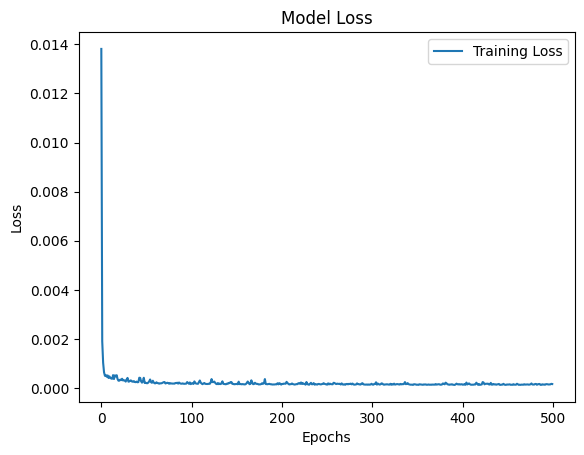

In [327]:
plt.plot(history.history['loss'], label='Training Loss')

plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [328]:
# Predict on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values to original scale
predictions = sc.inverse_transform(predictions)
y_test_actual = sc.inverse_transform(y_test.reshape(-1, 1))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


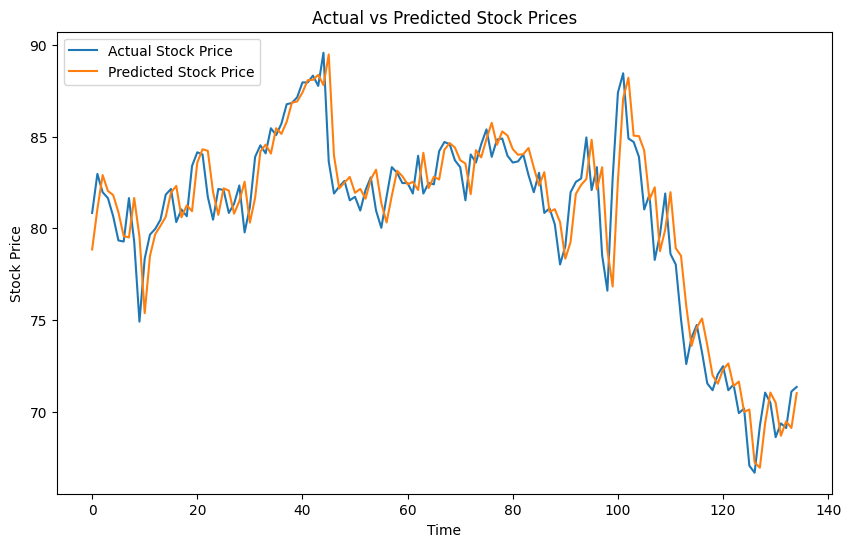

In [329]:
plt.figure(figsize=(10,6))
plt.plot(y_test_actual, label='Actual Stock Price')
plt.plot(predictions, label='Predicted Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()